# Introducción

El objetivo de esta práctica es mostrar al alumno las posibilidades que ofrece R para analizar datos de distintas fuentes diferentes, extraer datos, comparar, hacer gráficas y sacar estadísticos.

Las fuentes de datos que se tienen son:
* Datos meteorológicos de Praga de 1775 hasta 2004: https://www.ncdc.noaa.gov/cdo-web/datasets
* Banco mundial: https://data.worldbank.org/topic/climate-change
* Nivel de CO2 en la atmósfera (Mauna Loa): https://www.esrl.noaa.gov/gmd/ccgg/trends/data.html

Todos los ficheros necesarios para resolver la práctica se ofrecen como adjuntos.

## Datos meteorológicos NOAA

Carga el tiempo meteorológico de Praga en un data.frame. Fichero: *EZE00100082*

In [5]:
weatherPraga<-read.csv("./datos/EZE00100082.csv", sep = ",")

Mostrar los 10 años que más precipitiaciones han tenido junto con su valor correspondiente (columna PRCP):

In [6]:
# Nos quedamos con los años y las precipitaciones

precipitacionesPorFecha <- weatherPraga[,c("DATE","PRCP")]

# Ordenamos por precipitaciones y nos quedamos con las 10 primeras

precipitacionesPorFecha[order(-precipitacionesPorFecha$PRCP),][1:10,]

,DATE,PRCP
165,1939,745.5
54,1828,665.4
228,2002,661.5
172,1946,638.3
116,1890,637.3
63,1837,634.9
184,1958,633.1
57,1831,625.7
192,1966,624.1
55,1829,622.4


* Muestra en un diagrama de dispersión la temperatura mínima registrada en un año (columna EMNT) en función del año registrado (columna DATE).
* Crear una regresión lineal (polinomio orden 1) que muestre la tendencia. Pintarla sobre el diagrama de dispersión.
* En media, ¿Cuantos grados ha aumentado la temperatura mínima cada año? (pendiente de la  regresión lineal)

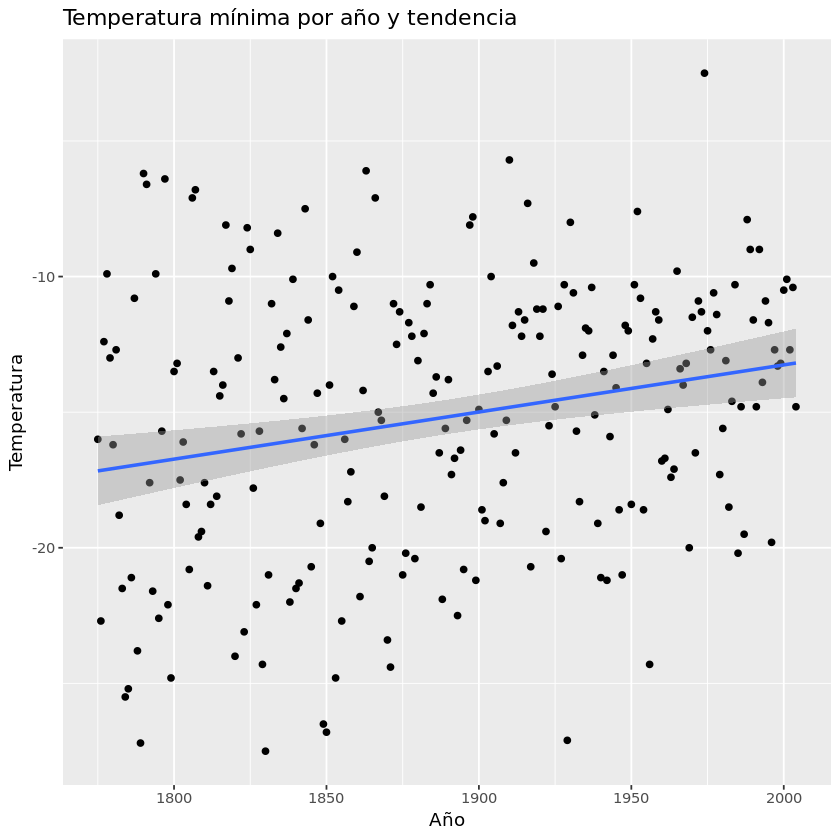

In [26]:
# Cargamos la librería ggplot2
library(ggplot2)

ggplot(data = weatherPraga, aes(x = DATE, y = EMNT)) +
    ggtitle("Temperatura mínima por año y tendencia") +
    xlab("Año") +
    ylab("Temperatura") +
    geom_point() +
    geom_smooth(method = lm)


In [44]:
coeficientesLM <- lm(formula = EMNT ~ DATE, data = weatherPraga)$coefficients

paste("La temperatura mínima ha aumentado anualmente de media: ", coeficientesLM[2])


[1] "La temperatura mínima ha aumentado anualmente de media:  0.0173750305134395"

¿Ha subido realmente la temperatura mínima?
* Calcula la media de la temperatura mínima (columna EMNT) del intervalo de años [1775,1794]
* Calcula la media de la temperatura mínima (columna EMNT) del intervalo de años [1985,2004]
* ¿Cual es la diferencia entre ambos? ¿Es estadísticamente significativa?
  * Nota: antes de aplicar un test estadístico hay que ver si cumple con los requisitos de ese test.

In [58]:
tempMinPraga1775_1794 <- weatherPraga$EMNT[weatherPraga$DATE >= 1775 & weatherPraga$DATE <= 1794]
tempMinPraga1985_2004 <- weatherPraga$EMNT[weatherPraga$DATE >= 1985 & weatherPraga$DATE <= 2004]

mediaTempMinPraga1775_1794 <- mean(tempMinPraga1775_1794)
mediaTempMinPraga1985_2004 <- mean(tempMinPraga1985_2004)

print(paste("La media de la temperatura mínima del intervalo [1775-1794] es:", mediaTempMinPraga1775_1794))
print(paste("La media de la temperatura mínima del intervalo [1985-2004] es:", mediaTempMinPraga1985_2004))
print(paste("La diferencia de las medias de los intervalos es:", mediaTempMinPraga1775_1794 - mediaTempMinPraga1985_2004))



[1] "La media de la temperatura mínima del intervalo [1775-1794] es: -16.935"
[1] "La media de la temperatura mínima del intervalo [1985-2004] es: -13.04"
[1] "La diferencia de las medias de los intervalos es: -3.895"


## Datos banco mundial

Carga los datos del banco mundial

In [55]:
databank<-read.csv("./datos/API_19_DS2_en_csv_v2.csv",skip=4)
#Borramos las X del nombre de la columna
colnames(databank)<-gsub("X","",colnames(databank))

countryData<-read.csv("./datos/Metadata_Country_API_19_DS2_en_csv_v2.csv")

# De esta forma podremos aceder a la información de paises usando su countryCode
rownames(countryData)<-countryData$Country.Code

realCountryData<-subset(countryData,IncomeGroup!="")
regionData<-subset(countryData,IncomeGroup=="")
print(paste("Tenemos un total de",nrow(realCountryData),"paises"))
print(paste("Tenemos un total de",nrow(regionData),"regiones"))
indicators<-read.csv("./datos/Metadata_Indicator_API_19_DS2_en_csv_v2.csv")
print(paste("Tenemos un total de",nrow(indicators),"indicadores"))

[1] "Tenemos un total de 217 paises"
[1] "Tenemos un total de 46 regiones"
[1] "Tenemos un total de 80 indicadores"


¿Cual fue el país que más toneladas de CO2 equivalente emitió en 1970 (Mostrar *Country.Name*)?
¿Cuanto contaminó?

Hay una dataframe con la lista de pasises en *realCountryData*
El número de toneladas de CO2 equivalente viene dado por el Indicator.Code *"EN.ATM.GHGT.KT.CE"*


In [60]:
# Vemos qué pinta tienen los datos
head(databank)
head(indicators)
head(realCountryData)

Country.Name,Country.Code,Indicator.Name,Indicator.Code,1960,1961,1962,1963,1964,1965,⋯,2009,2010,2011,2012,2013,2014,2015,2016,2017,
Aruba,ABW,Urban population (% of total),SP.URB.TOTL.IN.ZS,50.776000,50.761000,50.746000,5.073000e+01,5.071500e+01,5.070000e+01,⋯,4.342100e+01,4.305900e+01,4.269800e+01,4.236400e+01,4.205800e+01,4.177900e+01,4.152800e+01,4.130400e+01,NA,NA
Aruba,ABW,Urban population,SP.URB.TOTL,27526.000000,28141.000000,28532.000000,2.876100e+04,2.892400e+04,2.908200e+04,⋯,4.405200e+04,4.377800e+04,4.357500e+04,4.345600e+04,4.339800e+04,4.336500e+04,4.333100e+04,4.329600e+04,NA,NA
Aruba,ABW,Urban population growth (annual %),SP.URB.GROW,3.117931,2.209658,1.379868,7.994038e-01,5.651398e-01,5.447726e-01,⋯,-7.305493e-01,-6.239346e-01,-4.647817e-01,-2.734659e-01,-1.335575e-01,-7.606930e-02,-7.843500e-02,-8.080622e-02,NA,NA
Aruba,ABW,"Population, total",SP.POP.TOTL,54211.000000,55438.000000,56225.000000,5.669500e+04,5.703200e+04,5.736000e+04,⋯,1.014530e+05,1.016690e+05,1.020530e+05,1.025770e+05,1.031870e+05,1.037950e+05,1.043410e+05,1.048220e+05,NA,NA
Aruba,ABW,Population growth (annual %),SP.POP.GROW,3.148037,2.238144,1.409622,8.324526e-01,5.926490e-01,5.734682e-01,⋯,9.861642e-02,2.126801e-01,3.769848e-01,5.121450e-01,5.929140e-01,5.874924e-01,5.246582e-01,4.599292e-01,NA,NA
Aruba,ABW,Poverty headcount ratio at $1.90 a day (2011 PPP) (% of population),SI.POV.DDAY,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


INDICATOR_CODE,INDICATOR_NAME,SOURCE_NOTE,SOURCE_ORGANIZATION,X
SP.URB.TOTL.IN.ZS,Urban population (% of total),Urban population refers to people living in urban areas as defined by national statistical offices. The data are collected and smoothed by United Nations Population Division.,The United Nations Population Division's World Urbanization Prospects.,NA
SP.URB.TOTL,Urban population,Urban population refers to people living in urban areas as defined by national statistical offices. It is calculated using World Bank population estimates and urban ratios from the United Nations World Urbanization Prospects. Aggregation of urban and rural population may not add up to total population because of different country coverages.,World Bank staff estimates based on the United Nations Population Division's World Urbanization Prospects.,NA
SP.URB.GROW,Urban population growth (annual %),Urban population refers to people living in urban areas as defined by national statistical offices. It is calculated using World Bank population estimates and urban ratios from the United Nations World Urbanization Prospects.,"World Bank Staff estimates based on United Nations, World Urbanization Prospects.",NA
SP.POP.TOTL,"Population, total","Total population is based on the de facto definition of population, which counts all residents regardless of legal status or citizenship. The values shown are midyear estimates.","(1) United Nations Population Division. World Population Prospects, (2) Census reports and other statistical publications from national statistical offices, (3) Eurostat: Demographic Statistics, (4) United Nations Statistical Division. Population and Vital Statistics Report (various years), (5) U.S. Census Bureau: International Database, and (6) Secretariat of the Pacific Community: Statistics and Demography Programme.",NA
SP.POP.GROW,Population growth (annual %),"Annual population growth rate for year t is the exponential rate of growth of midyear population from year t-1 to t, expressed as a percentage . Population is based on the de facto definition of population, which counts all residents regardless of legal status or citizenship.","Derived from total population. Population source: (1) United Nations Population Division. World Population Prospects, (2) Census reports and other statistical publications from national statistical offices, (3) Eurostat: Demographic Statistics, (4) United Nations Statistical Division. Population and Vital Statistics Reprot (various years), (5) U.S. Census Bureau: International Database, and (6) Secretariat of the Pacific Community: Statistics and Demography Programme.",NA
SI.POV.DDAY,Poverty headcount ratio at $1.90 a day (2011 PPP) (% of population),"Poverty headcount ratio at $1.90 a day is the percentage of the population living on less than $1.90 a day at 2011 international prices. As a result of revisions in PPP exchange rates, poverty rates for individual countries cannot be compared with poverty rates reported in earlier editions.","World Bank, Development Research Group. Data are based on primary household survey data obtained from government statistical agencies and World Bank country departments. Data for high-income economies are from the Luxembourg Income Study database. For more information and methodology, please see PovcalNet (http://iresearch.worldbank.org/PovcalNet/index.htm).",NA


,Country.Code,Region,IncomeGroup,SpecialNotes,TableName,X
ABW,ABW,Latin America & Caribbean,High income,SNA data for 2000-2011 are updated from official government statistics; 1994-1999 from UN databases. Base year has changed from 1995 to 2000.,Aruba,NA
AFG,AFG,South Asia,Low income,"Fiscal year end: March 20; reporting period for national accounts data is calendar year, estimated to insure consistency between national accounts and fiscal data. National accounts data are sourced from the IMF and differ from the Central Statistics Organization numbers due to exclusion of the opium economy.",Afghanistan,NA
AGO,AGO,Sub-Saharan Africa,Lower middle income,,Angola,NA
ALB,ALB,Europe & Central Asia,Upper middle income,,Albania,NA
AND,AND,Europe & Central Asia,High income,WB-3 code changed from ADO to AND to align with ISO code.,Andorra,NA
ARE,ARE,Middle East & North Africa,High income,,United Arab Emirates,NA


In [102]:
# Nos quedamos sólo con los datos de los países, cruzándolos con el df 'realCountryData'
datosPaises <- merge(databank, realCountryData, by = "Country.Code", all = F)

# Filtramos sobre los datos y nos quedamos con el nombre del país y sus toneladas de CO2
contaminacionPorPais1970 <- datosPaises[datosPaises$Indicator.Code == "EN.ATM.GHGT.KT.CE", c("Country.Name", "1970")]

# Seleccionamos el más contaminante
paisMasContaminante1970 <- contaminacionPorPais1970[order(-contaminacionPorPais1970$"1970"),][1,]

print(paste("El país que más CO2 ha emitido en 1970 ha sido", paisMasContaminante1970$Country.Name, "con", paisMasContaminante1970$"1970", "toneladas."))



[1] "El país que más CO2 ha emitido en 1970 ha sido United States con 5400503.5 toneladas."


¿Cuales fueron los 5 países que más toneladas de CO2 equivalente emitieron en 2012? ¿Cuantas kt emitieron?

In [162]:
contaminacionPorPais2012 <- datosPaises[datosPaises$Indicator.Code == "EN.ATM.GHGT.KT.CE", c("Country.Name", "2012")]

# Seleccionamos el más contaminante
top5PaisesMasContaminante2012 <- contaminacionPorPais2012[order(-contaminacionPorPais2012$'2012'),][1:5,]

print("Los 5 países que más toneladas de CO2 equivalente emitieron en 2012 fueron:")
top5PaisesMasContaminante2012

print(paste("Con un total de", sum(top5PaisesMasContaminante2012$"2012"),"ktoneladas"))





[1] "Los 5 países que más toneladas de CO2 equivalente emitieron en 2012 fueron:"


,Country.Name,2012
2905,China,12454711
16280,United States,6343841
7149,India,3002895
2098,Brazil,2989418
13246,Russian Federation,2803398


[1] "Con un total de 27594262.4849943 ktoneladas"



¿Cual ha sido la media del **porcentaje** de crecimiento de las emisiones de CO2 equivalente en China desde 2000 hasta 2012?

In [165]:
# Seleccionamos los datos de China
datosChina <- datosPaises[datosPaises$Country.Name == 'China' & datosPaises$Indicator.Code == 'EN.ATM.GHGT.KT.CE', ]

# Nos quedamos con los años 1999 y 2012
datosChina1999_2012 <- datosChina[,c("Country.Name", "1999":"2012")]

# Cambiamos filas por columnas
library("reshape2")
datosChina1999_2012_t <- melt(datosChina1999_2012, id = "Country.Name")

# Creamos una columna con el ratio de crecimiento de las emisiones
datosChina1999_2012_t$ratioCrecimiento <- c(NA, datosChina1999_2012_t$value[2:nrow(datosChina1999_2012_t)] / datosChina1999_2012_t$value[1:nrow(datosChina1999_2012_t) - 1])

#Calculamos la media de los ratios
print(paste("La media del porcentaje de crecimiento anual es del", round(mean(datosChina1999_2012_t$ratioCrecimiento, na.rm = TRUE), 2), "%"))


[1] "La media del porcentaje de crecimiento anual es del 1.07 %"


Compara las emisiones de CO2(kt) per cápita (clave en Indicator.Code: *EN.ATM.CO2E.PC*) de todos los paises en 1960,1990 y 2014 mediante:
* diagrama de cajas
* histograma
* curvas de densidad

In [191]:
# Seleccionamos los datos del indicador, del pais y los años

emisionesPerCapita <- datosPaises[datosPaises$Indicator.Code == "EN.ATM.CO2E.PC", c("Country.Name", "1960", "1990", "2014")]

emisionesPerCapita_t <- melt(emisionesPerCapita, id = "Country.Name")

colnames(emisionesPerCapita_t) <- c("Country", "Year", "CO2")

head(emisionesPerCapita_t)

Country,Year,CO2
Aruba,1960,NA
Afghanistan,1960,0.0460599
Angola,1960,0.0974716
Albania,1960,1.2581949
Andorra,1960,NA
United Arab Emirates,1960,0.1187577


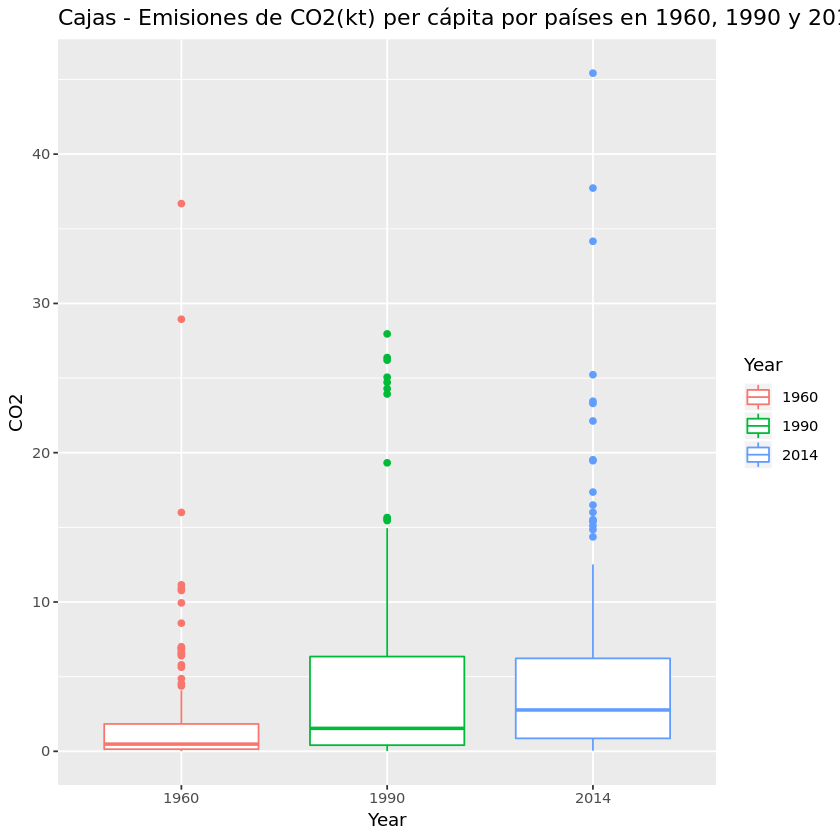

In [192]:
ggplot(data = emisionesPerCapita_t, aes(x = Year,y = CO2, color = Year)) + 
  ggtitle("Cajas - Emisiones de CO2(kt) per cápita por países en 1960, 1990 y 2014") +
  geom_boxplot(na.rm = T)

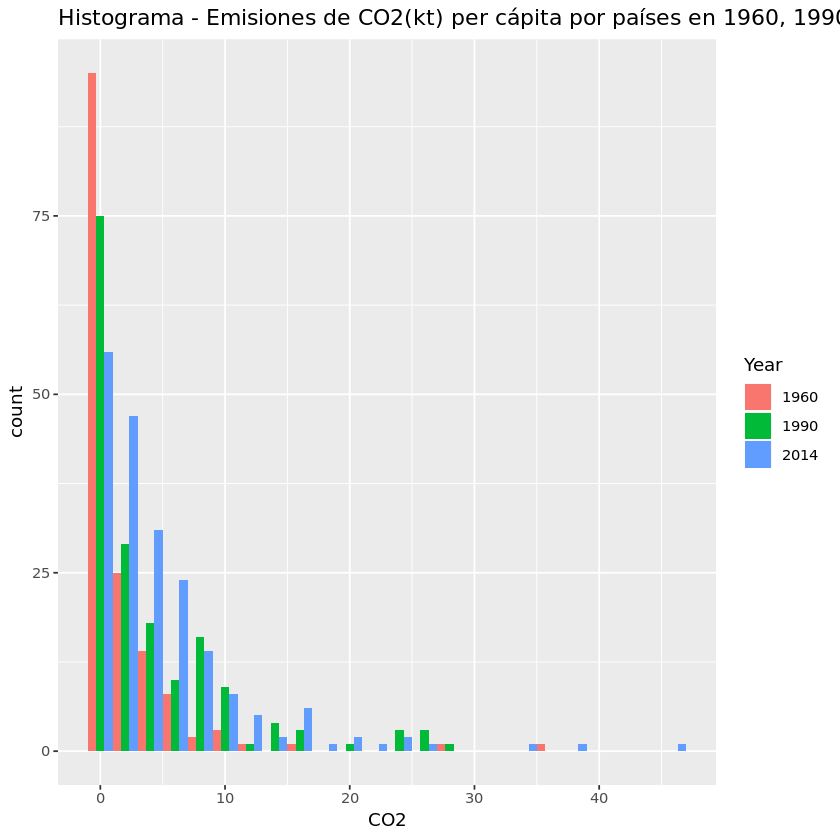

In [193]:
ggplot(data = emisionesPerCapita_t, aes(CO2, fill = Year)) + 
    ggtitle("Histograma - Emisiones de CO2(kt) per cápita por países en 1960, 1990 y 2014") +
    geom_histogram(position = "dodge", binwidth = 2, na.rm = T)

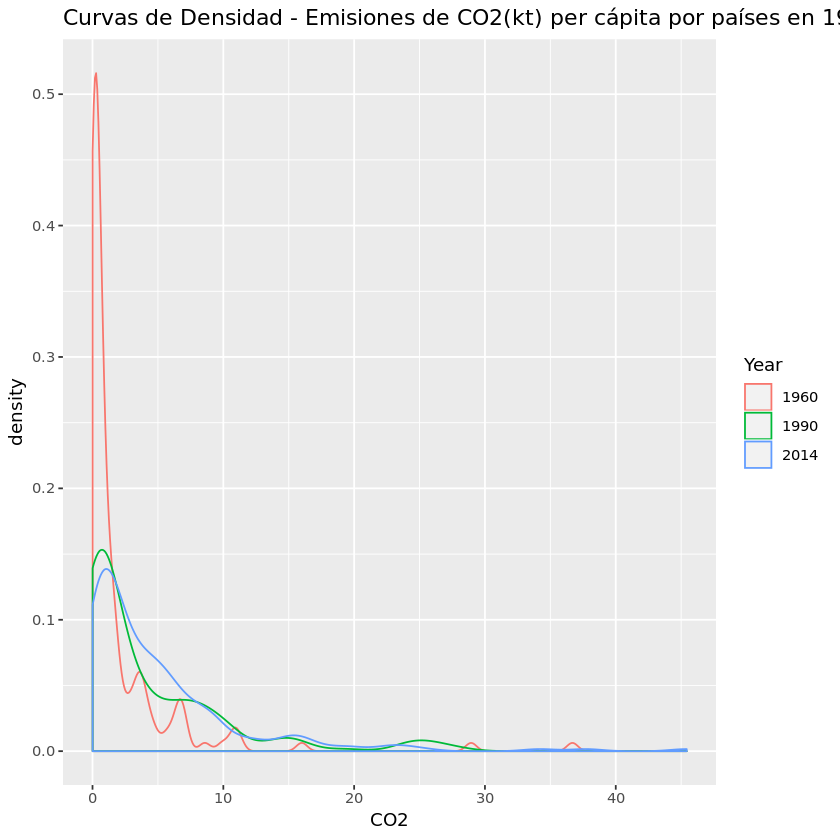

In [194]:
ggplot(data = emisionesPerCapita_t, aes(CO2, color = Year)) + 
    ggtitle("Curvas de Densidad - Emisiones de CO2(kt) per cápita por países en 1960, 1990 y 2014") +
    geom_density(na.rm = T)

Utilizando ggplot: Compara en una gráfica las emisiones totales de CO2 (clave en Indicator.Code: EN.ATM.CO2E.KT) en función del año de las siguientes regiones:
* Mundo entero: WLD
* Unión europea: EUU
* Africa subsahariana: SSA
* Norteamérica: NAC
* Este de Asia y pacífico: TEA

Ayuda: Tendrás que usar la función *melt()* para transformar los años, cada año en una columna, en un data.frame donde cada uno esté en una fila.

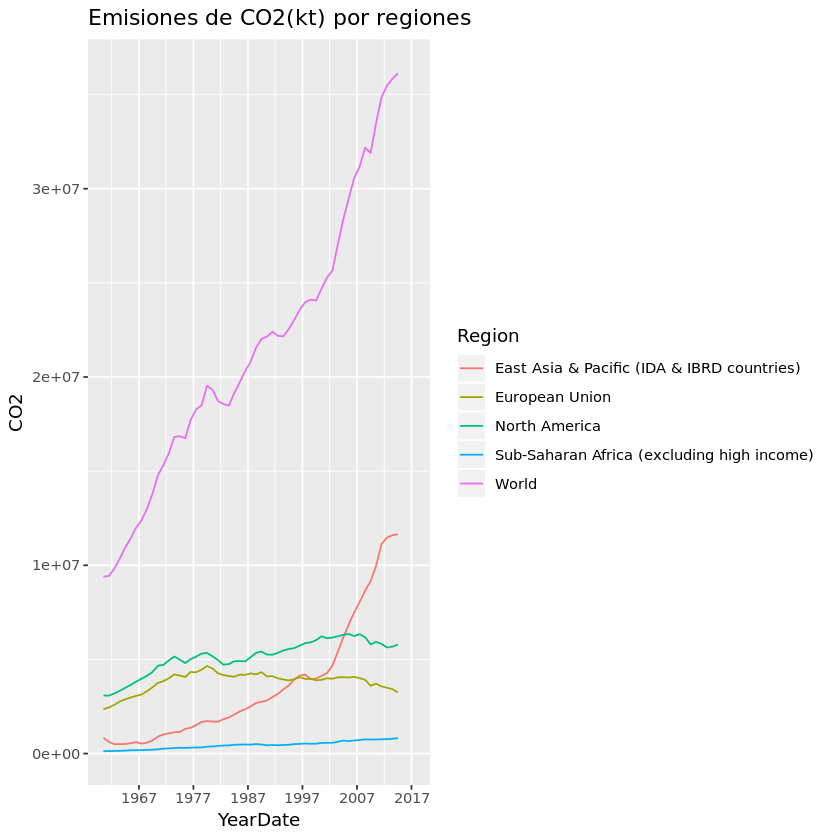

In [269]:
# Seleccionamos los datos de las emisiones de CO2 y filtramos por las regiones
emisionesCO2PorRegiones <- subset(databank, Indicator.Code == 'EN.ATM.CO2E.KT' & 
                     Country.Code %in% c("WLD","EUU","SSA","NAC","TEA"), c(1,5:ncol(databank)))

# Transformamos las filas por las columnas
emisionesCO2PorRegiones_t <- melt(emisionesCO2PorRegiones, id = "Country.Name")

colnames(emisionesCO2PorRegiones_t) <- c("Region", "Year", "CO2")

# Creamos un campo fecha para poder agrupar los valores del eje del gráfico
emisionesCO2PorRegiones_t$YearDate <- as.Date(paste(emisionesCO2PorRegiones_t$Year, 7, 1, sep = "-"), format="%Y-%m-%d")

# head(emisionesCO2PorRegiones_t)

ggplot(data=emisionesCO2PorRegiones_t, aes(x = YearDate, y = CO2, color = Region)) +
    geom_line(na.rm = T) +
    scale_x_date(date_breaks = "10 year", date_labels = "%Y") +
    ggtitle("Emisiones de CO2(kt) por regiones")

Suponiendo que la tendencia se mantiene, es decir, que no se aplica ninguna política a nivel global de reducción de emisiones de CO2, ¿cual sería el total de emisiones de CO2 en todo el mundo en el año 2020?

Para calcularlo utiliza tres modelos lineales:
* Regresión lineal con polinomio grado 1
* Regresión lineal polinomio grado 3
* Regresión lineal polinomio grado 10

Represénta en una gráfica el valor real y el calculado por cada uno de los 3 modelos.

,Year,CO2,prediccion1,prediccion3,prediccion10
54,2013,35837591,32952984,36253660,35609941
55,2014,36138285,33399318,37437242,36398599
56,2015,NA,33845652,38683409,37809201
57,2016,NA,34291986,39994255,40445705
58,2017,NA,34738320,41371876,45199822
59,2018,NA,35184654,42818365,53336808
60,2019,NA,35630989,44335816,66598498
61,2020,NA,36077323,45926324,87325918


[1] "La predicción con polinomio de grado 1 es de 36077323 kt."
[1] "La predicción con polinomio de grado 3 es de 45926324 kt."
[1] "La predicción con polinomio de grado 10 es de 87325918 kt."


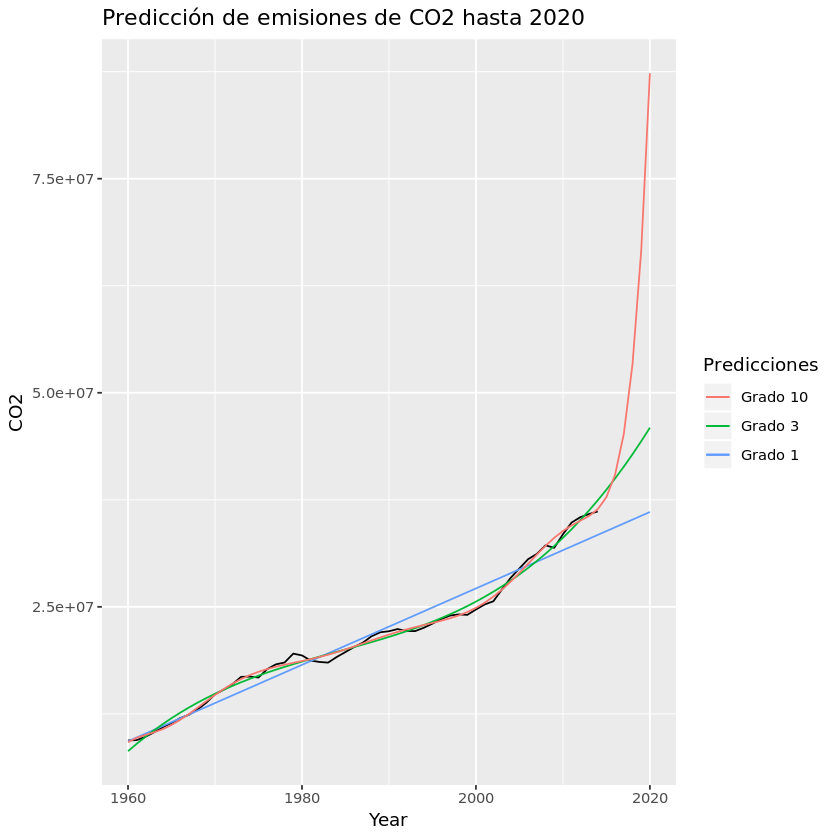

In [339]:
# Seleccionamos las emisiones para la región mundial
emisionesMundiales <- subset(databank, Country.Code == "WLD" & Indicator.Code == 'EN.ATM.CO2E.KT')[,as.character(seq(1960,2014,1))]

# Agregamos una fila con los años
emisionesMundiales <- rbind(seq(1960,2014,1), emisionesMundiales)

# Cambiamos filas por columnas
emisionesMundiales_t <- data.frame(t(emisionesMundiales))
colnames(emisionesMundiales_t) <- c("Year","CO2")

# head(emisionesMundiales)

# Seleccionamos el año y la cantidad de emisiones
emisionesMundiales_t <- emisionesMundiales_t[,c("Year", "CO2")]

# head(emisionesMundiales_t)

# Creamos las regresiones lineales
# Lineal
lm1 <- lm(CO2 ~ Year, data = emisionesMundiales_t)

# Polinomio grado 3
lm3 <- lm(CO2 ~ poly(Year, 3), data = emisionesMundiales_t)

# Polinomio grado 10
lm10 <- lm(CO2 ~ poly(Year, 10), data = emisionesMundiales_t)

# Creamos el dataframe para realizar las predicciones desde 2014 a 2020
allYears <- data.frame("Year" = c(1960:2020))

# predicción para regresión lineal
lm1ConPrediccion <- data.frame(Year = allYears, prediccion1  = predict(lm1,  allYears))

# Lo agregamos al dataframe
emisionesMundiales_t <- merge(emisionesMundiales_t, lm1ConPrediccion, by = "Year", all=T)

lm3ConPrediccion  <- data.frame(Year = allYears, prediccion3  = predict(lm3,  allYears))
emisionesMundiales_t <- merge(emisionesMundiales_t, lm3ConPrediccion, by = "Year", all=T)

lm10ConPrediccion <- data.frame(Year = allYears, prediccion10 = predict(lm10, allYears))
emisionesMundiales_t <- merge(emisionesMundiales_t, lm10ConPrediccion, by = "Year", all=T)

# Comprobamos que tenemos los datos y las predicciones en el mismo dataframe
tail(emisionesMundiales_t, n = 8)

print(paste("La predicción con polinomio de grado 1 es de", round(emisionesMundiales_t$prediccion1[emisionesMundiales_t$Year == 2020], 0), "kt."))
print(paste("La predicción con polinomio de grado 3 es de", round(emisionesMundiales_t$prediccion3[emisionesMundiales_t$Year == 2020], 0), "kt."))
print(paste("La predicción con polinomio de grado 10 es de", round(emisionesMundiales_t$prediccion10[emisionesMundiales_t$Year == 2020], 0), "kt."))

ggplot(data = emisionesMundiales_t) +  
    ggtitle("Predicción de emisiones de CO2 hasta 2020") +
    geom_line(aes(x = Year, y = CO2), na.rm = T) +
    geom_line(aes(x = Year, y = prediccion1, color = "red")) +
    geom_line(aes(x = Year, y = prediccion3, color = "green")) +
    geom_line(aes(x = Year, y = prediccion10, color = "blue")) +
    scale_color_discrete(name = "Predicciones", labels = c("Grado 10", "Grado 3", "Grado 1"))

## Nivel de CO2

En esta parte vamos a trabajar con el nivel medio de CO2 medido por el NOAA en Manuna Loa (Hawai) desde 1968.

In [340]:
co2ppm<-read.csv("./datos/co2_mm_mlo.txt",skip=73,sep="",header = F, 
                 col.names= c("year","month","date","average","interpolated","trend","days"))

Representa el diagrama de dispersión entre:
* CO2 medido en la atmósfera (co2ppm\$interpolated)
* CO2 emitido por todos los países (databank con Indicator.Code=="EN.ATM.CO2E.KT" y Country.Code=="WLD"?

¿Cual es su correlación?


Nota: 

* Los valores en co2ppm vienen en meses, habrá que agregarlos, calcular la media anual a partir de los meses para así poder hacer la correlación con databank.
* Los valores en databank vienen en columnas, habrá que pasarlos a filas utilizando la función *melt*.

Year,CO2_Medido_Hawai
1958,315.1889
1959,315.9742
1960,316.9075


Year,CO2,prediccion1,prediccion3,prediccion10
1960,9396706,9297274,8140592,9186916
1961,9434403,9743608,9004036,9710532
1962,9818840,10189942,9819069,10037740


Warning message:
“Removed 3 rows containing missing values (geom_point).”

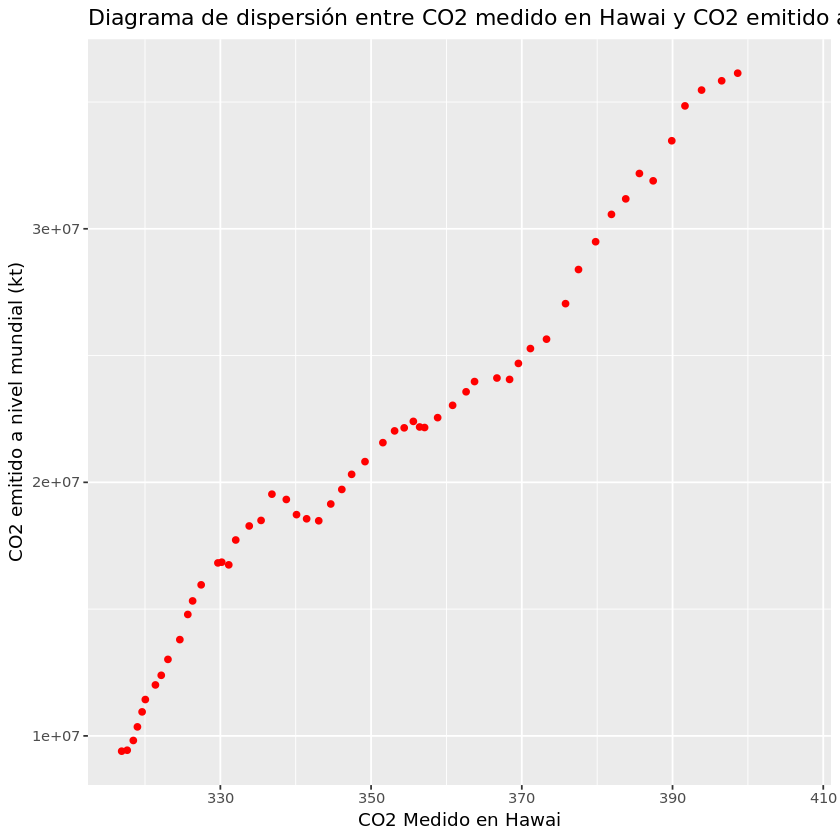

In [350]:
# Agregamos y calculamos el nivel de CO2 medio anual
yearlyco2ppm<-aggregate(interpolated ~ year, data = co2ppm, mean)

# Renombramos las columnas
colnames(yearlyco2ppm) <- c("Year","CO2_Medido_Hawai")

head(yearlyco2ppm, n = 3)

head(emisionesMundiales_t, n = 3)

emisiones_totales_con_mediciones_hawai <- merge(emisionesMundiales_t, yearlyco2ppm, by = "Year")

ggplot(data = emisiones_totales_con_mediciones_hawai, aes(x = CO2_Medido_Hawai, y = CO2)) +
    ggtitle("Diagrama de dispersión entre CO2 medido en Hawai y CO2 emitido a nivel mundial") + 
    geom_point(color = "red") +
    xlab("CO2 Medido en Hawai") +
    ylab("CO2 emitido a nivel mundial (kt)")


Calcular la matriz de correlación de las siguientes variables:
* Cantidad de CO2 en la atmósfera
* Emisiones totales CO2 en la atmósfera
* Temperatura mínima en praga (columna EMNT).

In [362]:
tiempo_minimo_praga <- weatherPraga[,c("DATE", "EMNT")]
colnames(tiempo_minimo_praga) <- c("Year", "Temp")

emisiones_totales_con_mediciones_hawai_praga <- merge(emisiones_totales_con_mediciones_hawai, tiempo_minimo_praga, by = "Year")

emisiones_totales_con_mediciones_hawai_praga <- emisiones_totales_con_mediciones_hawai_praga[c("CO2", "CO2_Medido_Hawai", "Temp")]

colnames(emisiones_totales_con_mediciones_hawai_praga) <- c("CO2 total emitido","CO2 medido en Hawai", "Temperatura mínima en Praga")

cor(emisiones_totales_con_mediciones_hawai_praga, use = "complete.obs")



,CO2 total emitido,CO2 medido en Hawai,Temperatura mínima en Praga
CO2 total emitido,1.0000000,0.9703198,0.2254552
CO2 medido en Hawai,0.9703198,1.0000000,0.1783153
Temperatura mínima en Praga,0.2254552,0.1783153,1.0000000
